<a href="https://colab.research.google.com/github/Arthur6363/Data-Science-ML/blob/main/diabetes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

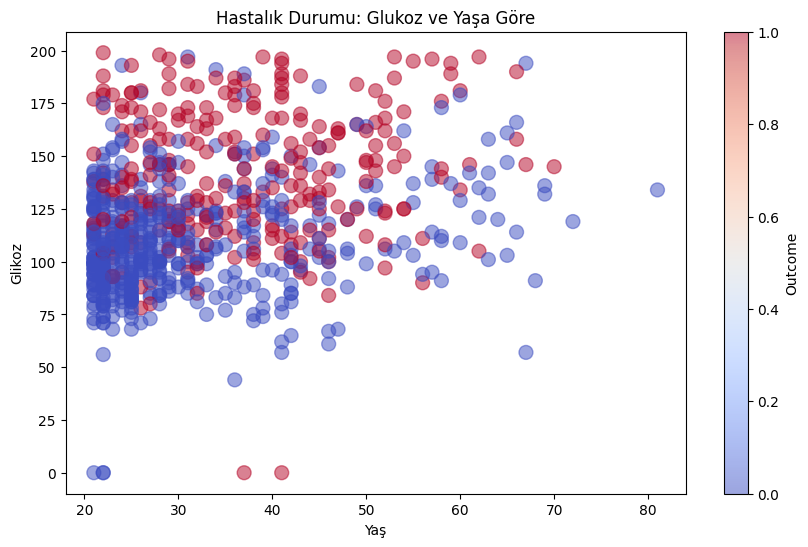

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Glucose'], c=df['Outcome'], cmap='coolwarm', s=100, alpha=0.5)
plt.colorbar(label='Outcome')
plt.xlabel('Yaş')
plt.ylabel('Glikoz')
plt.title('Hastalık Durumu: Glukoz ve Yaşa Göre')
plt.show()

In [17]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [18]:
x = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,random_state=63, test_size=0.24)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# prompt: standar scaler df

sc.fit(df)
df_standar = sc.transform(df)


In [28]:
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model = knn.fit(x_train1, y_train)
model.score(x_train1,y_train)

0.8181818181818182

In [41]:
y_pred = model.predict(x_test1)

In [42]:
scoreliste = []
for i in range(1,30):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train1,y_train)
  scoreliste.append(knn2.score(x_test1,y_test))

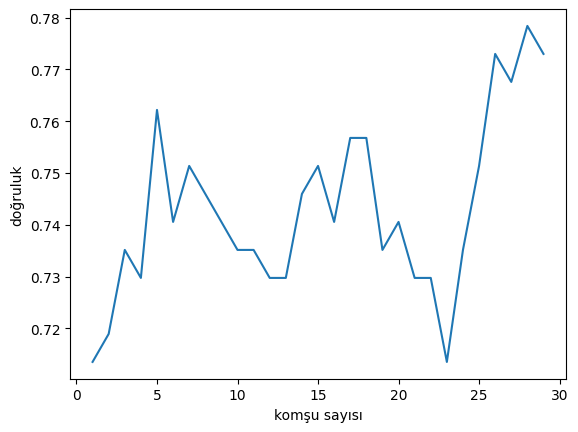

In [43]:
plt.plot(range(1,30),scoreliste)
plt.xlabel("komşu sayısı")
plt.ylabel("doğruluk")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  17],
       [ 27,  37]])